In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])


OneHotEncoder()

In [ ]:
# Load and preprocess images from the 'yes' class
data_yes = []
result_yes = []
for root, dirs, files in os.walk('/content/drive/MyDrive/brain_tumor_dataset/yes'):
    for file in files:
        if file.endswith('.jpg'):
            img_path = os.path.join(root, file)
            img = Image.open(img_path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data_yes.append(img)
                result_yes.append([0])  # 'yes' class label

# Load and preprocess images from the 'no' class
data_no = []
result_no = []
for root, dirs, files in os.walk('/content/drive/MyDrive/brain_tumor_dataset/no'):
    for file in files:
        if file.endswith('.jpg'):
            img_path = os.path.join(root, file)
            img = Image.open(img_path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data_no.append(img)
                result_no.append([1])  # 'no' class label

# Combine data and labels
data = np.concatenate([data_yes, data_no])
result = np.concatenate([result_yes, result_no])

# Encode labels
result_encoded = encoder.fit_transform(result).toarray()

# Verify the shapes
print("Data shape:", data.shape)
print("Result shape:", result_encoded.shape)


Data shape: (139, 128, 128, 3)
Result shape: (139, 2)


In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

In [ ]:
import matplotlib.pyplot as plt

# Count the number of 'yes' (tumor) and 'no' (normal) samples
tumor_count = np.sum(result_encoded[:, 0] == 1)  # Count of 'yes' class
normal_count = np.sum(result_encoded[:, 1] == 1)  # Count of 'no' class

# Create labels and counts for the bar plot
labels = ['Tumor', 'Normal']
counts = [tumor_count, normal_count]

# Example colors for the bar plot
colors = ['skyblue', 'lightcoral']


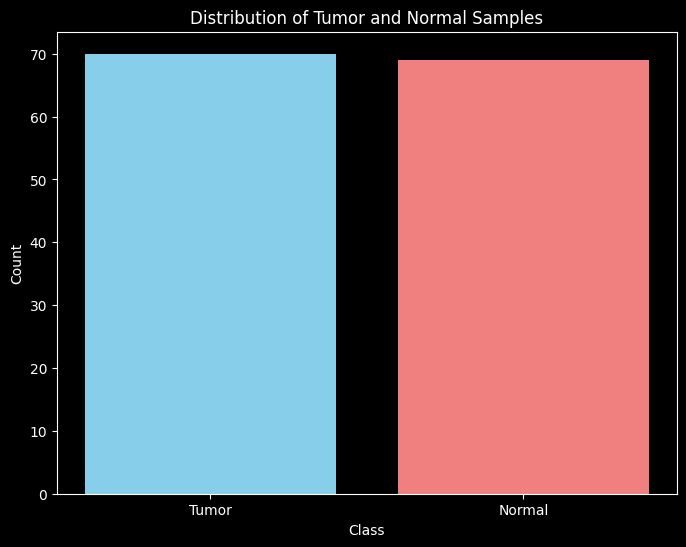

In [ ]:
# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.title('Distribution of Tumor and Normal Samples')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

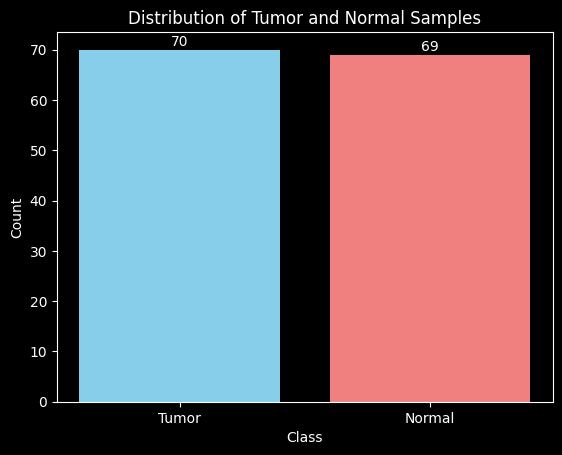

In [ ]:
# Count the number of Tumor and Normal samples
tumor_count = np.sum(result_encoded[:, 0] == 1)
normal_count = np.sum(result_encoded[:, 1] == 1)

# Create labels and counts for the bar plot
labels = ['Tumor', 'Normal']
counts = [tumor_count, normal_count]

# Example colors that are complementary and visually pleasing
colors = ['skyblue', 'lightcoral']

# Plot the bar plot
plt.bar(labels, counts, color=colors)

# Add count numbers on top of each bar
for i in range(len(labels)):
    plt.text(i, counts[i] + 0.1, str(counts[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Distribution of Tumor and Normal Samples')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()


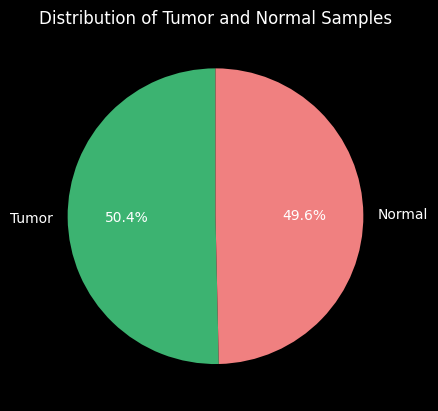

In [ ]:
total_samples = len(result_encoded)
tumor_percentage = (tumor_count / total_samples) * 100
normal_percentage = (normal_count / total_samples) * 100

# Create labels and counts for the pie chart
labels = ['Tumor', 'Normal']
counts = [tumor_percentage, normal_percentage]
colors = ['mediumseagreen', 'lightcoral']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Tumor and Normal Samples')
plt.show()

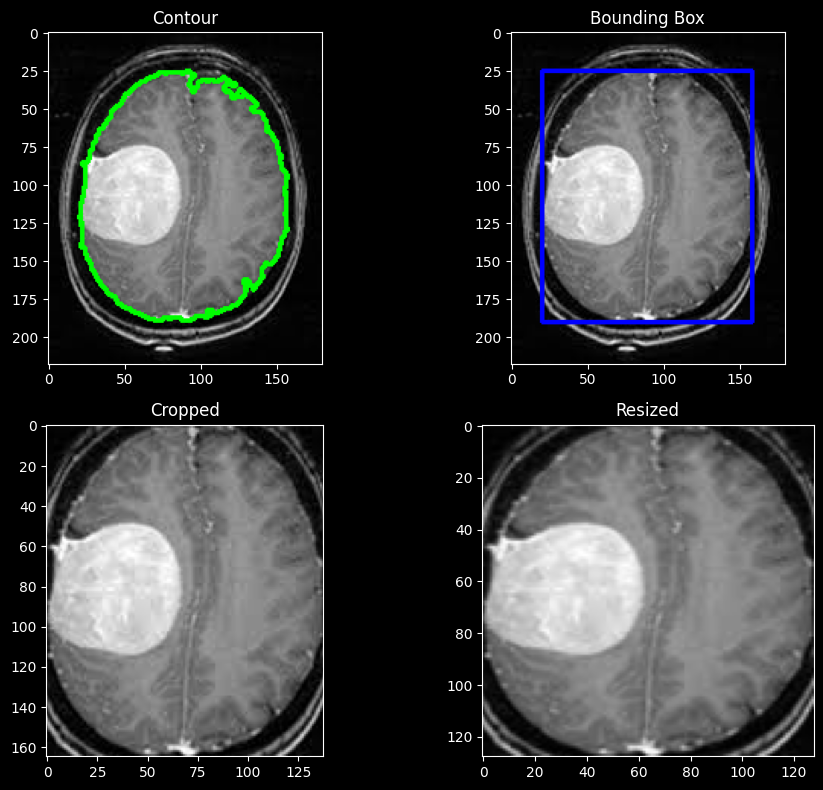

In [ ]:
import cv2
import matplotlib.pyplot as plt

def crop_brain_region(image, output_size):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply thresholding or other preprocessing techniques to extract the brain region
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours of the brain region
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the largest contour (assuming it's the brain)
    contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw the contour and bounding box on the original image
    contour_image = cv2.drawContours(image.copy(), [contour], -1, (0, 255, 0), 2)
    bounding_box_image = cv2.rectangle(image.copy(), (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Crop the brain region from the original image
    cropped_image = image[y:y+h, x:x+w]

    # Resize the cropped image to the specified output size
    resized_image = cv2.resize(cropped_image, output_size)

    return contour_image, bounding_box_image, cropped_image, resized_image

output_size = (128, 128)

example_image = cv2.imread('/content/drive/MyDrive/brain_tumor_dataset/yes/Y1.jpg')
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

contour_image, bounding_box_image, cropped_image, resized_image = crop_brain_region(example_image, output_size)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(contour_image)
plt.title("Contour")

plt.subplot(2, 2, 2)
plt.imshow(bounding_box_image)
plt.title("Bounding Box")

plt.subplot(2, 2, 3)
plt.imshow(cropped_image)
plt.title("Cropped")

plt.subplot(2, 2, 4)
plt.imshow(resized_image)
plt.title("Resized")

plt.tight_layout()
plt.show()

# Assuming `data` is a list of images
all_cropped = []

# Applying the crop function to each one of our images
for image in data:
    _, _, _, resized_image = crop_brain_region(image, output_size)
    all_cropped.append(resized_image)


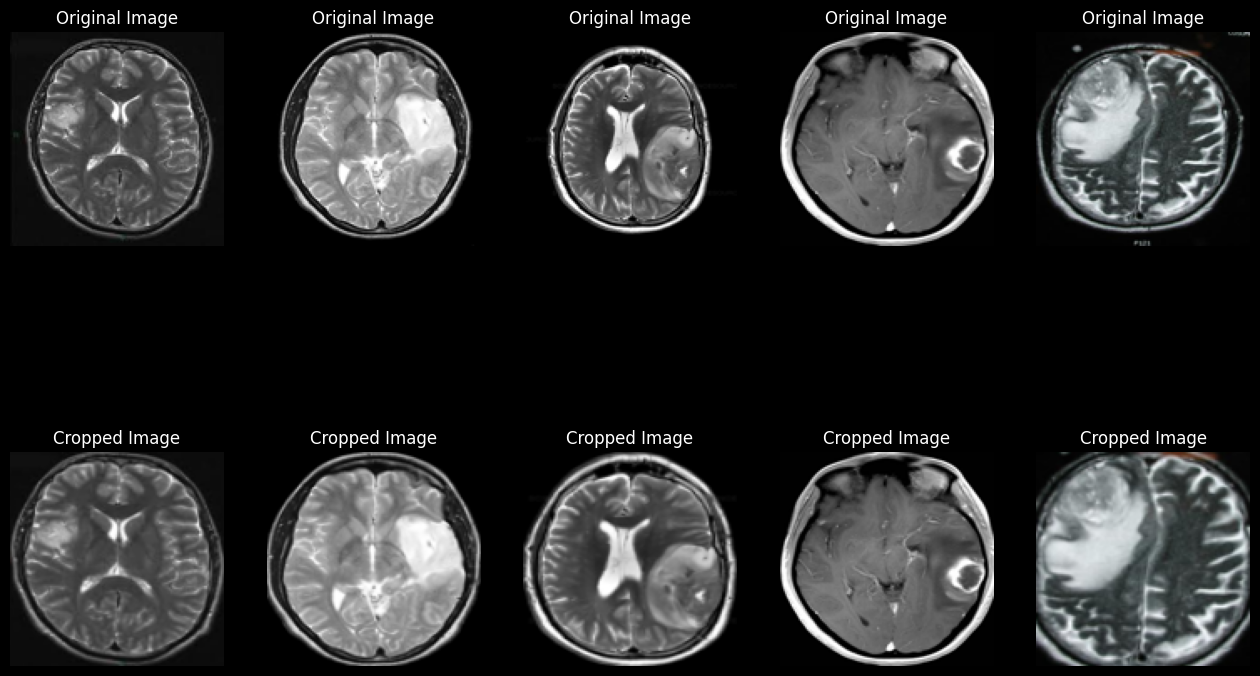

In [ ]:
num_images_per_class = 5

class_0_counter = 0
class_1_counter = 0

plt.figure(figsize=(16, 10))

for i in range(num_images_per_class):
    plt.subplot(2, num_images_per_class, i + 1)
    plt.imshow(data[i])
    plt.title("Original Image")
    plt.axis("off")

for i in range(num_images_per_class):
    plt.subplot(2, num_images_per_class, num_images_per_class + i + 1)
    plt.imshow(all_cropped[i])
    plt.title("Cropped Image")
    plt.axis("off")

plt.show()

# **Splitting of data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result_encoded, test_size=0.2, shuffle=True, random_state=42)

# **CNN MODEL**

model = Sequential(name = 'CNN_MODEL')

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
model.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])

print(model.summary())


In [ ]:
y_train.shape

(111, 2)

In [ ]:
# Check the configuration of the output layer
output_layer = model.layers[-1]
print("Output Layer Configuration:")
print("Number of Neurons:", output_layer.units)
print("Activation Function:", output_layer.activation.__name__)

Output Layer Configuration:
Number of Neurons: 2
Activation Function: softmax


In [ ]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 40, verbose = 1,
                    validation_data = (x_test, y_test))

model.save("brain_tumor_model.h5")


Epoch 1/20
3/3 [==============================] - 14s 1s/step - loss: 49.2295 - accuracy: 0.5315 - val_loss: 106.2167 - val_accuracy: 0.4643
Epoch 2/20
3/3 [==============================] - 0s 83ms/step - loss: 28.3482 - accuracy: 0.5586 - val_loss: 5.7099 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 0s 82ms/step - loss: 8.1845 - accuracy: 0.6757 - val_loss: 38.5491 - val_accuracy: 0.5714
Epoch 4/20
3/3 [==============================] - 0s 83ms/step - loss: 8.3006 - accuracy: 0.7027 - val_loss: 12.9407 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 0s 82ms/step - loss: 3.4315 - accuracy: 0.8018 - val_loss: 3.2991 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 0s 87ms/step - loss: 4.5961 - accuracy: 0.8198 - val_loss: 3.4608 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 0s 84ms/step - loss: 2.8943 - accuracy: 0.7928 - val_loss: 4.7061 - val_accuracy: 0.8214
Epoch 8/20
3/3 [======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
evaluation_results = model.evaluate(x_test, y_test)

# 'evaluate' method returns a list of metrics, including accuracy
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

1/1 [==============================] - 0s 37ms/step - loss: 2.8193 - accuracy: 0.8571
Model Accuracy on Test Set: 85.71%


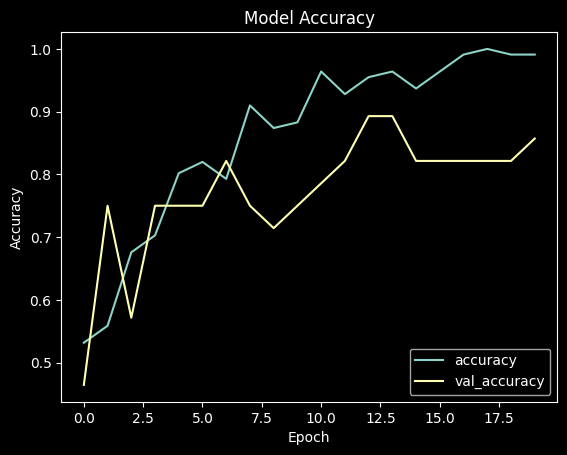

In [ ]:
# Model Accuracy Graph Plot

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


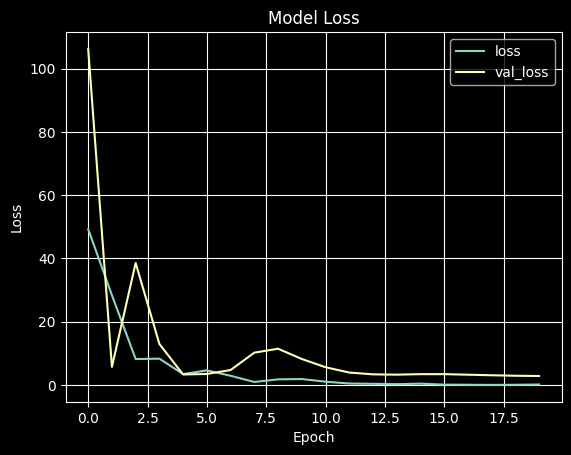

In [ ]:
# Model Loss Graph Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots for accuracy and loss
fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "Loss"))

# Add training and validation accuracy to the plot
fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines', name='Training Accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'), row=1, col=1)

# Add training and validation loss to the plot
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'), row=1, col=2)
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'), row=1, col=2)

# Update layout
fig.update_layout(title='Training History', xaxis_title='Epoch', yaxis_title='Value')

# Show the interactive plot
fig.show()


# **VGG16 MODEL**

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load VGG16 model pretrained on ImageNet data
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers in the VGG16 model
for layer in vgg16_model.layers:
    layer.trainable = False

# Extract features using the VGG16 model
def extract_vgg16_features(img):
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16_model.predict(img)
    return features.flatten()

# Load and preprocess the dataset
data = []
labels = []

for folder in ['yes', 'no']:
    folder_path = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/', folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = image.load_img(img_path, target_size=(128, 128))
            img = image.img_to_array(img)
            feature = extract_vgg16_features(img)
            data.append(feature)
            labels.append(1 if folder == 'yes' else 0)

data = np.array(data)
labels = to_categorical(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a new model
model = Sequential()

# Add a dense layer on top of VGG16
model.add(Dense(512, activation='relu', input_shape=(8192,)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))



1/1 [==============================] - 0s 17ms/step
Epoch 1/20
5/5 [==============================] - 1s 59ms/step - loss: 18.8902 - accuracy: 0.6691 - val_loss: 21.6724 - val_accuracy: 0.6286
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 10.7544 - accuracy: 0.7868 - val_loss: 25.1018 - val_accuracy: 0.6286
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 4.1728 - accuracy: 0.8529 - val_loss: 11.4526 - val_accuracy: 0.7714
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 3.3450 - accuracy: 0.8750 - val_loss: 14.9604 - val_accuracy: 0.8000
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 1.1564 - accuracy: 0.9412 - val_loss: 15.5331 - val_accuracy: 0.7429
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1117 - accuracy: 0.9853 - val_loss: 13.9395 - val_accuracy: 0.7714
Epoch 7/20
5/5 [==============================] - 0s 15ms/step - loss: 0.2850 - accuracy: 0.9853 - val_los

In [ ]:
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


2/2 [==============================] - 0s 8ms/step - loss: 14.4240 - accuracy: 0.7429
Model Accuracy on Test Set: 74.29%


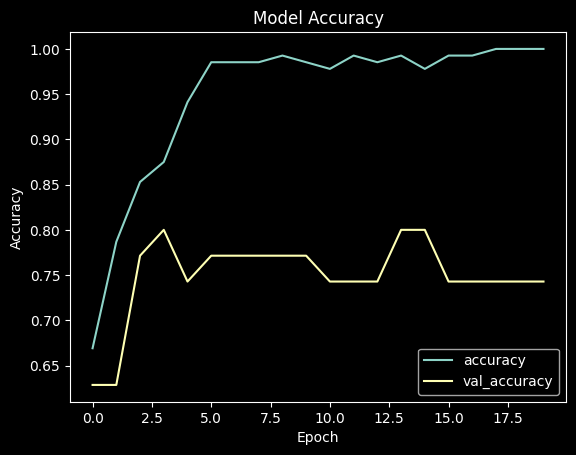

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Load VGG16 model pretrained on ImageNet data
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers in the VGG16 model
for layer in vgg16_model.layers:
    layer.trainable = False

# Extract features using the VGG16 model
def extract_vgg16_features(img):
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16_model.predict(img)
    return features.flatten()

# Load and preprocess the dataset
data = []
labels = []

for folder in ['yes', 'no']:
    folder_path = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/', folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = image.load_img(img_path, target_size=(128, 128))
            img = image.img_to_array(img)
            feature = extract_vgg16_features(img)
            data.append(feature)
            labels.append(1 if folder == 'yes' else 0)

data = np.array(data)
labels = to_categorical(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a new model
model = Sequential(name = 'VGG_16')

# Add a dense layer on top of VGG16
model.add(Dense(512, activation='relu', input_shape=(8192,)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print(f"Model Accuracy on Test Set: {accuracy:.2f}")


1/1 [==============================] - 0s 25ms/step
Epoch 1/20
5/5 [==============================] - 1s 67ms/step - loss: 27.8108 - accuracy: 0.5515 - val_loss: 50.6819 - val_accuracy: 0.6000
Epoch 2/20
5/5 [==============================] - 0s 18ms/step - loss: 8.4584 - accuracy: 0.8382 - val_loss: 23.9351 - val_accuracy: 0.7143
Epoch 3/20
5/5 [==============================] - 0s 19ms/step - loss: 5.4694 - accuracy: 0.8676 - val_loss: 32.3302 - val_accuracy: 0.7714
Epoch 4/20
5/5 [==============================] - 0s 21ms/step - loss: 2.1686 - accuracy: 0.9265 - val_loss: 36.3458 - val_accuracy: 0.7429
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 3.1895 - accuracy: 0.9044 - val_loss: 17.9156 - val_accuracy: 0.7429
Epoch 6/20
5/5 [==============================] - 0s 19ms/step - loss: 1.9153 - accuracy: 0.9191 - val_loss: 14.8144 - val_accuracy: 0.8000
Epoch 7/20
5/5 [==============================] - 0s 20ms/step - loss: 0.7698 - accuracy: 0.9485 - val_loss

In [ ]:
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


2/2 [==============================] - 0s 7ms/step - loss: 25.7178 - accuracy: 0.7429
Model Accuracy on Test Set: 74.29%


# **ResNet**

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Flatten, Concatenate
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input

# Load VGG16 model pretrained on ImageNet data
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Load ResNet50 model pretrained on ImageNet data
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers in the VGG16 and ResNet50 models
for layer in vgg16_model.layers:
    layer.trainable = False

for layer in resnet50_model.layers:
    layer.trainable = False

# Define input layer
input_layer = Input(shape=(128, 128, 3))

# Preprocess input for both models
vgg_preprocessed = preprocess_input(input_layer)
resnet_preprocessed = preprocess_input(input_layer)

# Obtain features from VGG16
vgg_features = vgg16_model(vgg_preprocessed)
vgg_flattened = Flatten()(vgg_features)

# Obtain features from ResNet50
resnet_features = resnet50_model(resnet_preprocessed)
resnet_flattened = Flatten()(resnet_features)

# Concatenate features from both models
concatenated = Concatenate()([vgg_flattened, resnet_flattened])

# Add dense layers
dense_layer = Dense(512, activation='relu')(concatenated)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(2, activation='softmax')(dropout_layer)

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the dataset
data = []
labels = []

for folder in ['yes', 'no']:
    folder_path = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/', folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = image.load_img(img_path, target_size=(128, 128))
            img = image.img_to_array(img)
            data.append(img)
            labels.append(1 if folder == 'yes' else 0)

data = np.array(data)
labels = to_categorical(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/20
5/5 [==============================] - 14s 1s/step - loss: 56.7790 - accuracy: 0.5515 - val_loss: 35.8566 - val_accuracy: 0.5143
Epoch 2/20
5/5 [==============================] - 1s 117ms/step - loss: 11.0886 - accuracy: 0.7206 - val_loss: 12.7034 - val_accuracy: 0.6571
Epoch 3/20
5/5 [==============================] - 1s 105ms/step - loss: 7.3222 - accuracy: 0.8235 - val_loss: 15.1071 - val_accuracy: 0.7429
Epoch 4/20
5/5 [==============================] - 0s 104ms/step - loss: 3.3348 - accuracy: 0.8971 - val_loss: 24.2649 - val_accuracy: 0.6571
Epoch 5/20
5/5 [==============================] - 1s 117ms/step - loss: 2.4971 - accuracy: 0.9191 - val_loss: 11.1188 - val_accuracy: 0.7429
Epoch 6/20
5/5 [==============================] - 0s 103ms/step - loss: 0.4388 - accuracy: 0.9559 - val_loss: 7.2744 - val_accuracy: 0.7714
Epoch 7/20
5/5 [==============================] - 1s 112ms/step - loss: 1.1814 - accuracy:

In [ ]:
# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]
print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


2/2 [==============================] - 8s 1s/step - loss: 8.6964 - accuracy: 0.8000
Model Accuracy on Test Set: 80.00%


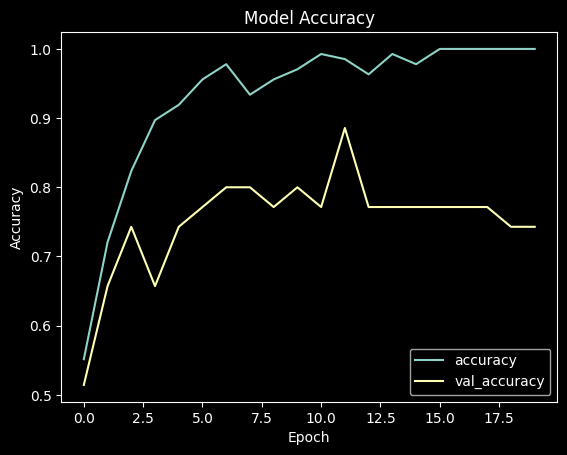

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

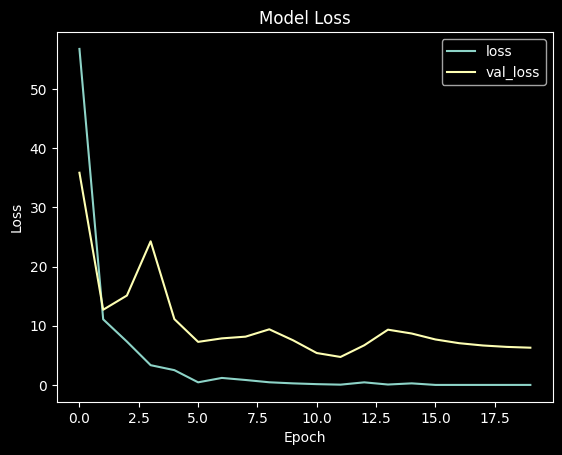

In [ ]:
#PLOT FOR LOSS VS VALIDATION LOSS OF MODEL

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


# **INCEPTION V3**

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3, preprocess_input

# Load InceptionV3 model pretrained on ImageNet data
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze all layers in the InceptionV3 model
for layer in inception_model.layers:
    layer.trainable = False

# Extract features using the InceptionV3 model
def extract_inception_features(img):
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = inception_model.predict(img)
    return features

# Load and preprocess the dataset
data = []
labels = []

for folder in ['yes', 'no']:
    folder_path = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/', folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = image.load_img(img_path, target_size=(299, 299))
            img = image.img_to_array(img)
            feature = extract_inception_features(img)
            data.append(feature)
            labels.append(1 if folder == 'yes' else 0)

data = np.array(data)
labels = to_categorical(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Reshape the extracted features to match the expected input shape of GlobalAveragePooling2D layer
x_train = np.reshape(x_train, (-1, 8, 8, 2048))
x_test = np.reshape(x_test, (-1, 8, 8, 2048))

# Create a new model
model = Sequential(name = 'Inception')

# Add GlobalAveragePooling2D layer to flatten the output of InceptionV3
model.add(GlobalAveragePooling2D(input_shape=(8, 8, 2048)))

# Add dense layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


1/1 [==============================] - 0s 26ms/step
Epoch 1/20
5/5 [==============================] - 1s 64ms/step - loss: 1.2435 - accuracy: 0.4779 - val_loss: 1.2584 - val_accuracy: 0.5143
Epoch 2/20
5/5 [==============================] - 0s 20ms/step - loss: 0.8637 - accuracy: 0.6471 - val_loss: 0.8274 - val_accuracy: 0.6571
Epoch 3/20
5/5 [==============================] - 0s 18ms/step - loss: 0.6874 - accuracy: 0.7206 - val_loss: 0.5567 - val_accuracy: 0.7714
Epoch 4/20
5/5 [==============================] - 0s 20ms/step - loss: 0.4535 - accuracy: 0.8162 - val_loss: 0.2999 - val_accuracy: 0.8857
Epoch 5/20
5/5 [==============================] - 0s 20ms/step - loss: 0.3414 - accuracy: 0.8529 - val_loss: 0.3323 - val_accuracy: 0.7714
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 0.2609 - accuracy: 0.8971 - val_loss: 0.4000 - val_accuracy: 0.8286
Epoch 7/20
5/5 [==============================] - 0s 20ms/step - loss: 0.2304 - accuracy: 0.9191 - val_loss: 0.295

In [ ]:

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


2/2 [==============================] - 0s 8ms/step - loss: 0.4450 - accuracy: 0.9143
Model Accuracy on Test Set: 91.43%


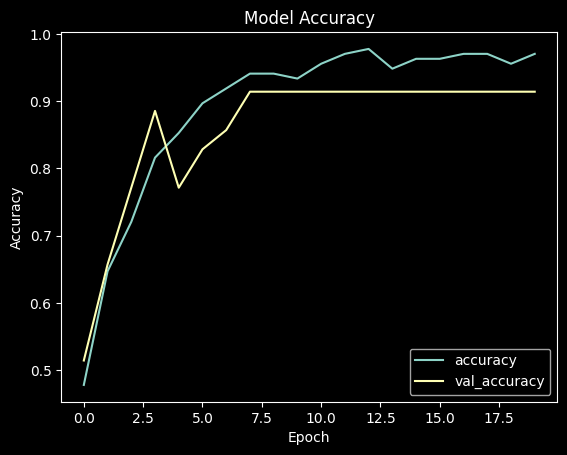

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

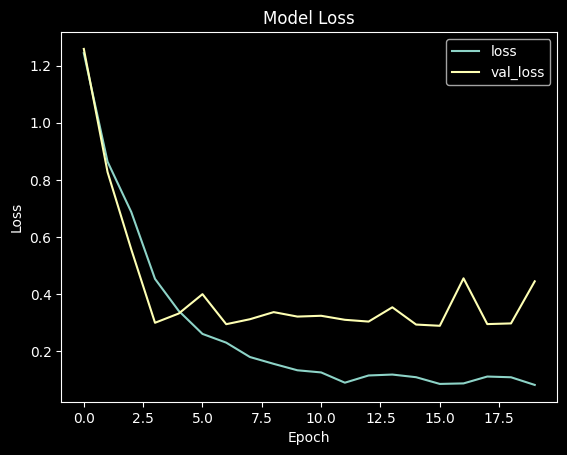

In [ ]:
# PLOT OF LOSS VS VALIDATION LOSS OF MODEL

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# **FINE-TUNING ON Inception V3**

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3, preprocess_input

# Load InceptionV3 model pretrained on ImageNet data
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Define the number of layers to freeze during fine-tuning
# You can experiment with different values
NUM_LAYERS_TO_FREEZE = 100

# Freeze only the first few layers
for layer in inception_model.layers[:NUM_LAYERS_TO_FREEZE]:
    layer.trainable = False

# Extract features using the InceptionV3 model
def extract_inception_features(img):
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = inception_model.predict(img)
    return features

# Load and preprocess the dataset
data = []
labels = []

for folder in ['yes', 'no']:
    folder_path = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/', folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = image.load_img(img_path, target_size=(299, 299))
            img = image.img_to_array(img)
            feature = extract_inception_features(img)
            data.append(feature)
            labels.append(1 if folder == 'yes' else 0)

data = np.array(data)
labels = to_categorical(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Reshape the extracted features to match the expected input shape of GlobalAveragePooling2D layer
x_train = np.reshape(x_train, (-1, 8, 8, 2048))
x_test = np.reshape(x_test, (-1, 8, 8, 2048))

# Create a new model
model = Sequential(name='FineTunedInception')

# Add GlobalAveragePooling2D layer to flatten the output of InceptionV3
model.add(GlobalAveragePooling2D(input_shape=(8, 8, 2048)))

# Add dense layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with fine-tuning
# You may need to adjust the learning rate and other hyperparameters for fine-tuning
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


1/1 [==============================] - 0s 26ms/step
Epoch 1/20
5/5 [==============================] - 1s 179ms/step - loss: 1.5585 - accuracy: 0.4926 - val_loss: 0.5308 - val_accuracy: 0.7714
Epoch 2/20
5/5 [==============================] - 0s 20ms/step - loss: 0.6198 - accuracy: 0.6985 - val_loss: 0.5461 - val_accuracy: 0.7143
Epoch 3/20
5/5 [==============================] - 0s 20ms/step - loss: 0.4006 - accuracy: 0.8529 - val_loss: 0.4169 - val_accuracy: 0.8286
Epoch 4/20
5/5 [==============================] - 0s 21ms/step - loss: 0.3237 - accuracy: 0.8676 - val_loss: 0.3556 - val_accuracy: 0.8571
Epoch 5/20
5/5 [==============================] - 0s 21ms/step - loss: 0.4088 - accuracy: 0.8309 - val_loss: 0.3013 - val_accuracy: 0.8571
Epoch 6/20
5/5 [==============================] - 0s 20ms/step - loss: 0.2256 - accuracy: 0.9265 - val_loss: 0.4609 - val_accuracy: 0.8286
Epoch 7/20
5/5 [==============================] - 0s 21ms/step - loss: 0.2592 - accuracy: 0.8824 - val_loss: 0.35

In [ ]:
evaluation_results = model.evaluate(x_test, y_test)
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


2/2 [==============================] - 0s 10ms/step - loss: 0.3876 - accuracy: 0.9143
Model Accuracy on Test Set: 91.43%


<function matplotlib.pyplot.show(close=None, block=None)>

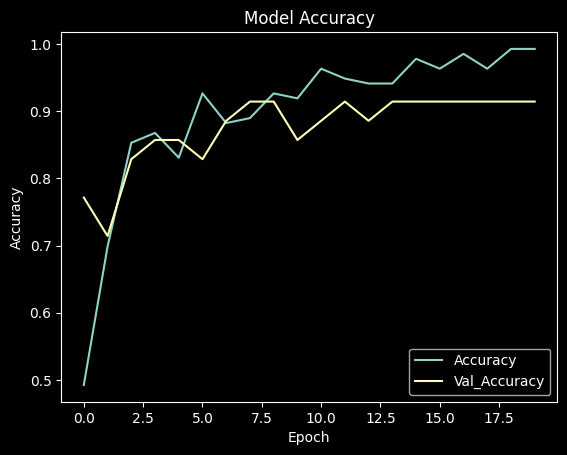

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show


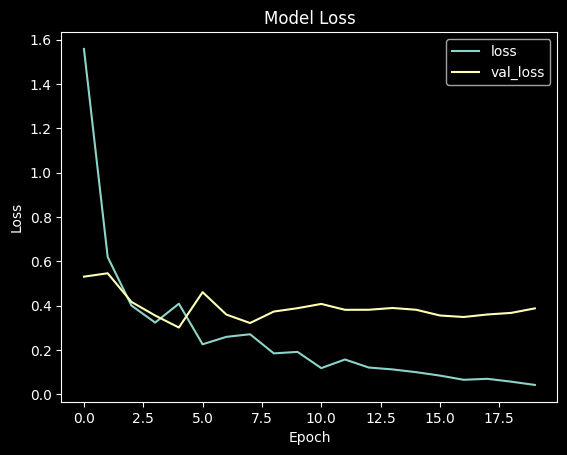

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots for accuracy and loss
fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "Loss"))

# Add training and validation accuracy to the plot
fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines', name='Training Accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'), row=1, col=1)

# Add training and validation loss to the plot
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'), row=1, col=2)
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'), row=1, col=2)

# Update layout
fig.update_layout(title='Training History', xaxis_title='Epoch', yaxis_title='Value')

# Show the interactive plot
fig.show()


In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of x_train: (136, 8, 8, 2048)
Shape of x_test: (35, 8, 8, 2048)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 'x_test', 'y_test' are test data
y_pred = model.predict(x_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

2/2 [==============================] - 0s 6ms/step
Accuracy: 0.9143
Precision: 0.8947
Recall: 0.9444
F1 Score: 0.9189


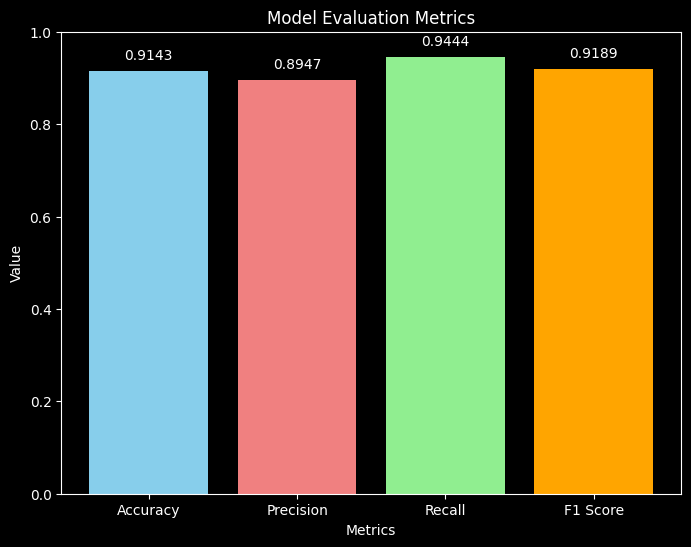

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9143, 0.8947, 0.9444, 0.9189]

# Plot the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])

# Add the total value on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{value:.4f}', ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limit to range [0, 1] for better visualization of scores
plt.show()


In [ ]:
def names(number):
    if number==0:
        return 'It\'s a Tumor'
    else:
        return 'No Tumor Found.'

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np

# Load the image
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/no/N17.jpg")

# Resize the image to the appropriate size expected by InceptionV3 (299, 299)
x = img.resize((299, 299))

# Convert the image to numpy array and preprocess it
x = np.array(x)
x = x / 255.0  # Normalize pixel values to [0, 1]
x = np.expand_dims(x, axis=0)  # Add batch dimension

# Make a prediction using the model
res = model.predict_on_batch(x)

# Get the predicted class
classification = np.argmax(res)

# Display the image and prediction result
imshow(img)
print("{:.2f}% Confidence - {}".format(res[0][classification]*100, classification))


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "FineTunedInception" is incompatible with the layer: expected shape=(None, 8, 8, 2048), found shape=(1, 299, 299, 3)


1/1 [==============================] - 0s 26ms/step
61.59% Confidence  Class: 0


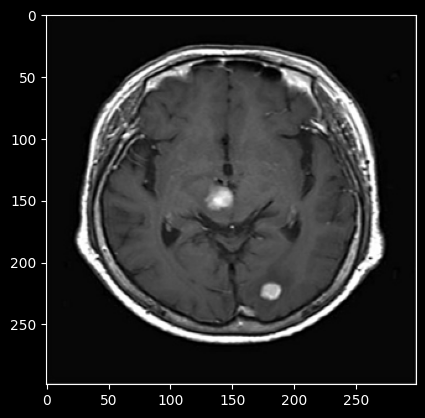

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

# Load the image
img = Image.open("/content/drive/MyDrive/brain_tumor_dataset/no/N17.jpg")

# Resize the image to the expected input shape of the convolutional base
img_resized = img.resize((299, 299))

# Convert the image to a numpy array
x = np.array(img_resized)

# Add a batch dimension
x = x.reshape(1, 299, 299, 3)

# Preprocess the image
x = preprocess_input(x)

# Extract features from the image
features = inception_model.predict(x)

# Reshape the features to match the expected input shape of the sequential model
features = features.reshape(1, 8, 8, 2048)

# Perform prediction
res = model.predict_on_batch(features)

# Get the predicted class
classification = np.argmax(res)

# Display the original image
imshow(img_resized)

# Print the confidence and predicted class
print(f"{res[0][classification]*100:.2f}% Confidence  Class: {classification}")


1/1 [==============================] - 0s 26ms/step
98.87521862983704% Confidence  It's a Tumor


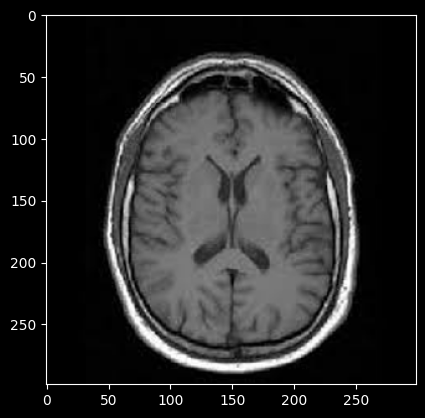

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

# Load the image
img = Image.open("/content/drive/MyDrive/brain_tumor_dataset/no/41 no.jpg")

# Resize the image to the expected input shape of the convolutional base
img_resized = img.resize((299, 299))

# Convert the image to a numpy array
x = np.array(img_resized)

# Add a batch dimension
x = x.reshape(1, 299, 299, 3)

# Preprocess the image
x = preprocess_input(x)

# Extract features from the image
features = inception_model.predict(x)

# Reshape the features to match the expected input shape of the sequential model
features = features.reshape(1, 8, 8, 2048)

# Perform prediction
res = model.predict_on_batch(features)

# Get the predicted class
classification = np.argmax(res)

# Display the original image
imshow(img_resized)

print(str(res[0][classification]*100) + '% Confidence  ' + names(classification))


100.0% Confidence ,It's a Tumor


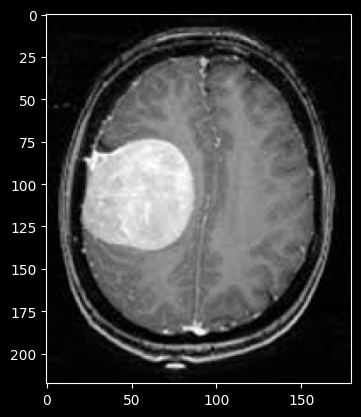

In [ ]:
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/yes/Y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ,' + names(classification))

99.99995231628418% Confidence  ,It's a Tumor


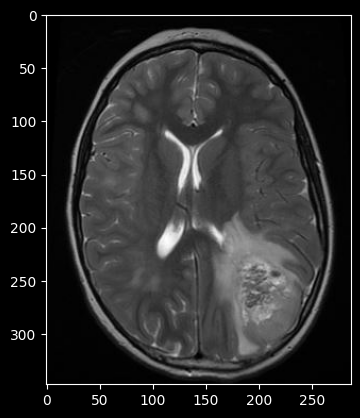

In [ ]:
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/yes/Y100.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence  ,' + names(classification))


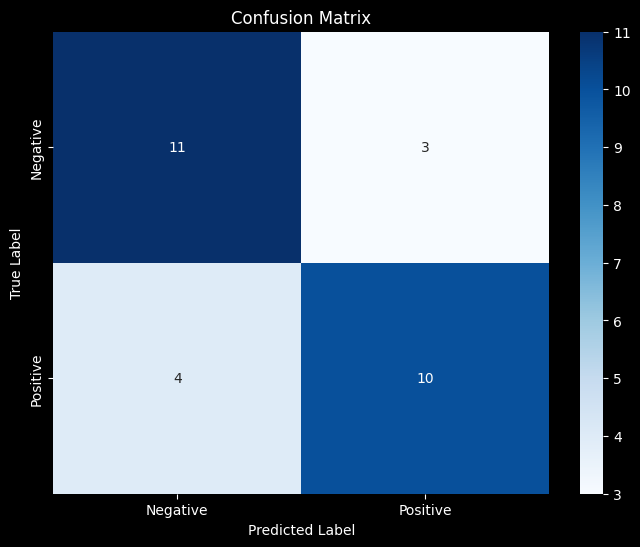

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("Data shape:", data.shape)
print("Result shape:", result.shape)


Data shape: (171, 1, 8, 8, 2048)
Result shape: (139, 2)
